   # ||||   Analysis On Time Series For Speech Emotion Recognition   ||||

In [6]:
pip install librosa soundfile numpy sklearn pyaudio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import libraries 
import librosa
import librosa.display
import soundfile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os, glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import IPython.display as ipd  # To play sound in the notebook
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [21]:
RAV = "C:\\Users\\patil\\OneDrive\\Desktop\\Data Science\\Arun Patil\\Project-6\\Actors\\"

# Run one example 
dir_list = os.listdir(RAV)
dir_list[0:24]


['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [7]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: labels, dtype: int64

In [45]:
RAV_df.to_excel(r"C:\\Users\\patil\\OneDrive\\Desktop\\Data Science\\Arun Patil\\Project-6\\Actors\\Excel.xlsx", index=False)

In [22]:
print(RAV_df.labels.isnull().sum())

0


In [25]:
RAV_df.describe()

,labels,source,path
count,1440,1440,1440
unique,14,1,1440
top,male_neutral,RAVDESS,C:\Users\patil\OneDrive\Desktop\Data Science\A...
freq,144,1440,1


In [8]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [9]:
#DataFlair - Emotions in the dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [10]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\patil\\OneDrive\\Desktop\\Data Science\\Arun Patil\\Project-6\\Actors\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=10)


132.23140495867767


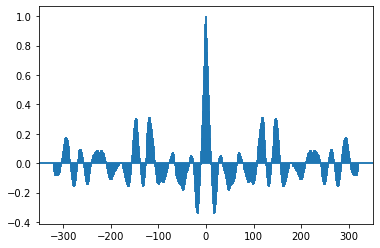

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [47]:
import  scipy.io.wavfile  as wav

def find_pitch(audiofile):
    fs,x = wav.read(audiofile)
    ms20=int((fs/50))
    ms2=int(fs/500)

    x=[i/32767 for i in x]

    y=plt.acorr(x,maxlags=ms20,normed=True)

    y=y[1]
    z=y[round(len(y)/2):]
    z=z[ms2:ms20]
    zmax=max(z)

    index=np.where(z==zmax)
    index=index[0][0]

    pitch=fs/(ms2+index+2)

    return pitch

p = find_pitch("C:\\Users\\patil\\OneDrive\\Desktop\\Data Science\\Arun Patil\\Project-6\\Actors\\Actor_01\\03-01-01-01-01-01-01.wav")
print(p)

In [11]:
#DataFlair - Split the dataset

x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [7]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [29]:
len(x_train), len(x_test)

(576, 192)

In [8]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [9]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [10]:
#DataFlair - Train the model
model.fit(x_train,y_train) 

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [11]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [31]:
y_pred

array(['happy', 'calm', 'happy', 'happy', 'fearful', 'calm', 'calm',
       'disgust', 'calm', 'happy', 'happy', 'calm', 'fearful', 'happy',
       'disgust', 'happy', 'calm', 'disgust', 'disgust', 'calm', 'calm',
       'disgust', 'disgust', 'calm', 'fearful', 'happy', 'calm', 'happy',
       'calm', 'fearful', 'happy', 'disgust', 'happy', 'calm', 'happy',
       'calm', 'calm', 'fearful', 'calm', 'calm', 'happy', 'calm', 'calm',
       'calm', 'fearful', 'calm', 'calm', 'calm', 'calm', 'happy',
       'fearful', 'fearful', 'calm', 'happy', 'happy', 'fearful',
       'disgust', 'happy', 'calm', 'calm', 'disgust', 'calm', 'happy',
       'calm', 'disgust', 'calm', 'calm', 'disgust', 'disgust', 'happy',
       'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'disgust',
       'fearful', 'happy', 'calm', 'fearful', 'calm', 'calm', 'fearful',
       'calm', 'disgust', 'calm', 'calm', 'fearful', 'happy', 'fearful',
       'disgust', 'calm', 'calm', 'happy', 'disgust', 'fearful', 'cal

In [51]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 73.44%


In [14]:
from sklearn.metrics import accuracy_score, f1_score

In [15]:
f1_score(y_test,y_pred, average=None)

array([0.82706767, 0.69135802, 0.7       , 0.66666667])

In [16]:
import pandas as pd
df=pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df.head(20)

,Actual,Predicted
0,happy,happy
1,calm,calm
2,happy,happy
3,happy,happy
4,disgust,fearful
5,calm,calm
6,happy,calm
7,happy,disgust
8,disgust,calm
9,happy,happy


In [17]:
import pickle
# writing a differant model files to file

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)

In [18]:
filename = 'modelForPrediction.sav'
loded_model = pickle.load(open(filename, 'rb')) #loading the file from the storage 



In [19]:
feature = extract_feature('C:\\Users\\arunp\\OneDrive\\Desktop\\DADS practice\\Internship\\Project-6\\Actor_01\\03-01-01-01-01-01-01.wav',mfcc=True, chroma=True, mel=True)
feature = feature.reshape(1,-1)
Prediction = loded_model.predict(feature)
Prediction

array(['calm'], dtype='<U7')

In [38]:
feature

array([[-6.93497009e+02,  5.00643921e+01,  5.71450770e-01,
         1.43299656e+01,  3.33636999e+00, -2.54071975e+00,
        -4.05790901e+00, -1.07119999e+01, -7.29414034e+00,
         1.74018872e+00, -4.19064283e+00,  1.95466173e+00,
        -5.24789429e+00,  2.78143024e+00, -3.16756773e+00,
        -3.40008307e+00, -2.37803221e+00, -5.68717718e-01,
        -6.47753382e+00, -1.24320555e+00, -2.80542517e+00,
        -5.43635798e+00, -4.46875244e-01, -3.63516617e+00,
        -2.98372602e+00, -5.63902497e-01, -1.65101981e+00,
        -5.55944800e-01, -3.41018438e+00, -2.24465466e+00,
        -3.13058877e+00, -2.70089960e+00, -1.88821304e+00,
        -5.54154336e-01, -3.96459913e+00, -2.13485193e+00,
        -3.94577074e+00, -1.62457895e+00, -2.03990722e+00,
        -3.62910867e+00,  6.33734703e-01,  6.48760676e-01,
         6.21744215e-01,  6.34553194e-01,  6.60345733e-01,
         6.60463989e-01,  7.00949013e-01,  7.31556296e-01,
         7.46921420e-01,  7.23420501e-01,  7.16119647e-0

In [46]:
from scipy.io.wavfile import read
samplerate, data= read("C:\\Users\\arunp\\OneDrive\\Desktop\\DADS practice\\Internship\\Project-6\\Actor_01\\03-01-01-01-01-01-01.wav")

In [50]:
samplerate

16000

In [47]:

data

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [48]:
duration=len(data)/samplerate
time=np.arange(0,duration,1/samplerate)

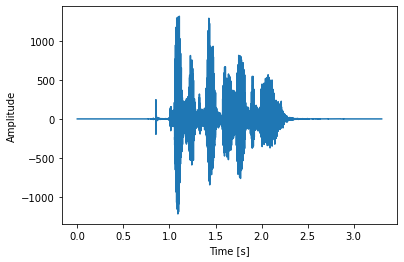

In [49]:
import matplotlib.pyplot as plt
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# |||||||||||||||| |||||||||||||||||||||||||||||        THANK YOU             ||||||||||||||||||||||||||    ||||||||||||||